# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Spring 2020

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
im1_file = './happy.jpg'
im2_file = './sad.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


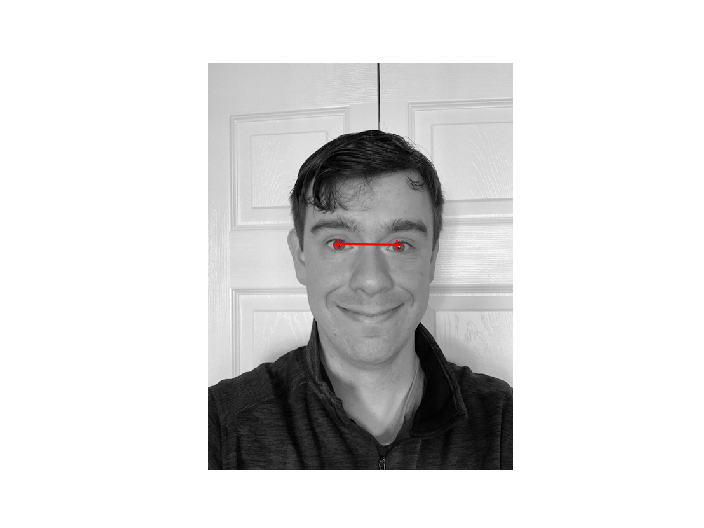

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


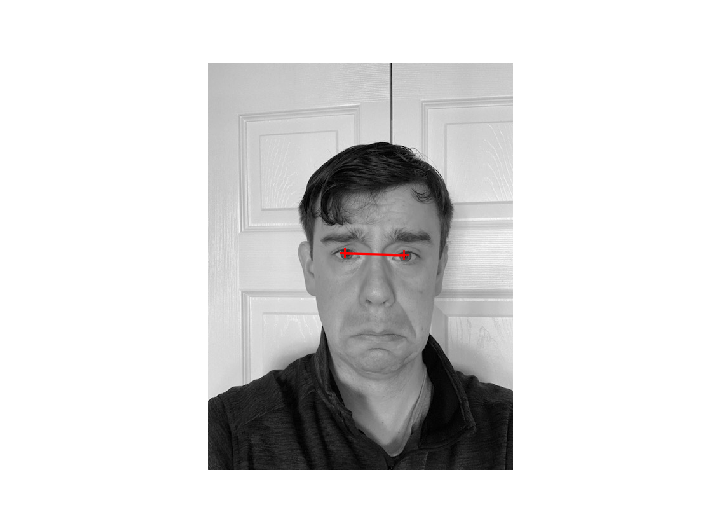

In [5]:
pts_im2 = utils.prompt_eye_selection(im2)

In [6]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [7]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


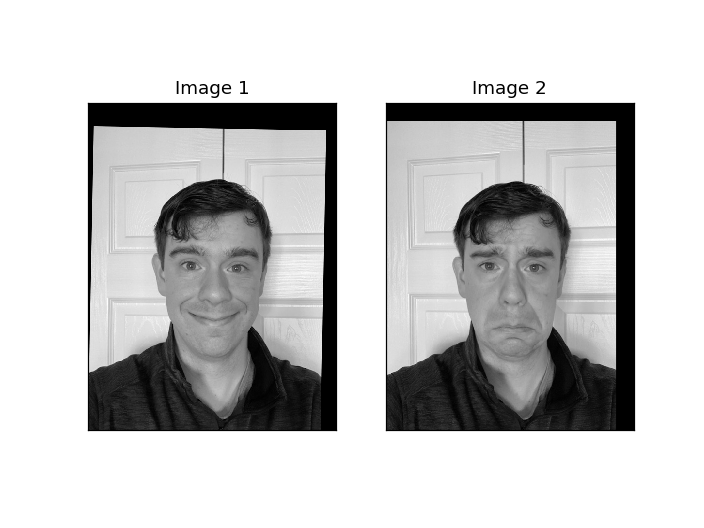

In [8]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [9]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''   
    #https://stackoverflow.com/questions/47369579/how-to-get-the-gaussian-filter
    
    sigma_low = 1./(2*np.pi*cutoff_low)
    sigma_high = 1./(2*np.pi*cutoff_high)
    
    fil_low = cv2.getGaussianKernel(25,sigma_low)
    fil_high = cv2.getGaussianKernel(25,sigma_high)
    fil_low = np.dot(fil_low,fil_low.T)
    fil_high = np.dot(fil_high,fil_high.T)
    im1_low = cv2.filter2D(im1, -1, fil_low)
    im2_low = cv2.filter2D(im2, -1, fil_high)
    return im2_low + im1 - im1_low, im1 - im1_low, im2_low  

<IPython.core.display.Javascript object>


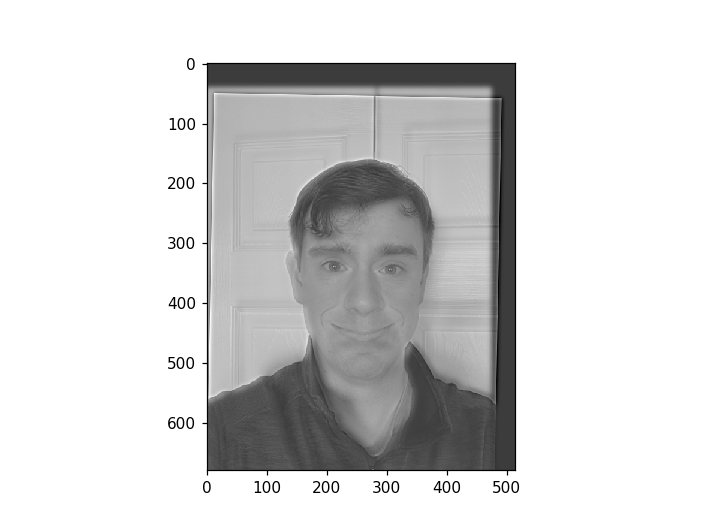

In [11]:
#https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype)
ksize_low = 20
ksize_high = 25
sigma_low = 0.3*((ksize_low-1)*0.5 - 1) + 0.8
sigma_high = 0.3*((ksize_high-1)*0.5 - 1) + 0.8
cutoff_low = 1./(2*np.pi*sigma_low)
cutoff_high = 1./(2*np.pi*sigma_high)

im_hybrid, im_high, im_low = hybridImage(im1, im2, cutoff_low, cutoff_high)

plt.close()
plt.imshow(im_hybrid, cmap='gray')


### Below is the final cropped hybrid image. The foreground (up close) image is my smiling and the background (far away) image is me frowning. The foreground image contains only high frequency imformation and the backround image contains only low frequencies. The hybrid image is created by simply adding these two images together. 

<IPython.core.display.Javascript object>


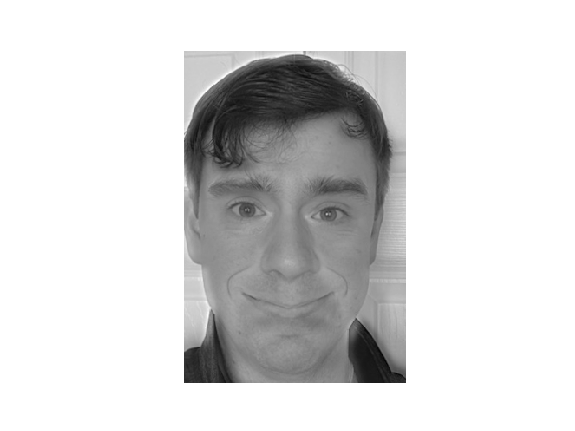

In [12]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

#### This figure is an example of a missaligned mistake

<IPython.core.display.Javascript object>


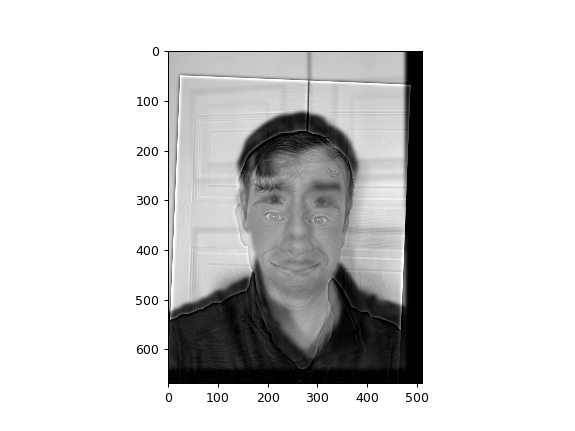

In [13]:
im_file = './mistake.png'
im1 = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)
plt.close()
plt.imshow(im1, cmap='gray')

#### These figures show the high frequency, low frequency, hybrid images and their cooresponding frequency plots. 

<IPython.core.display.Javascript object>


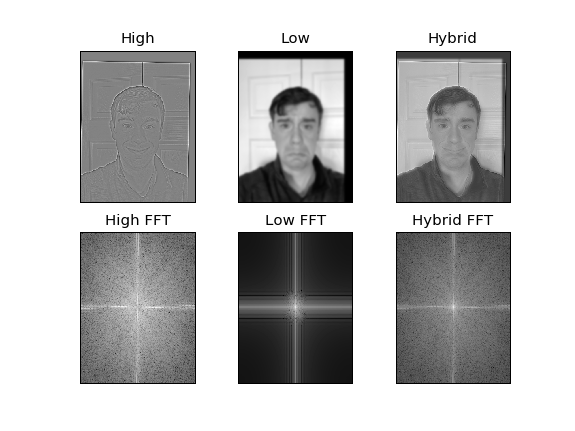

In [14]:
plt.close()
fig, axes = plt.subplots(2, 3)
axes[0,0].imshow(im_high,cmap='gray')
axes[0,0].set_title('High'), axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(im_low,cmap='gray')
axes[0,1].set_title('Low'), axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[0,2].imshow(im_hybrid,cmap='gray')
axes[0,2].set_title('Hybrid'), axes[0,2].set_xticks([]), axes[0,2].set_yticks([])

axes[1,0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_high)))),cmap='gray')
axes[1,0].set_title('High FFT'), axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_low)))),cmap='gray')
axes[1,1].set_title('Low FFT'), axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
axes[1,2].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))),cmap='gray')
axes[1,2].set_title('Hybrid FFT'), axes[1,2].set_xticks([]), axes[1,2].set_yticks([]);

## Color Hybrid Image (Bells and Whistles)

#### Changing emotion hybrid image example with color (bells and wistles). It seems best to use the color on the low frequency image. Using the color from the high frequency image seems to overwhelm the low frequencies. 

<IPython.core.display.Javascript object>


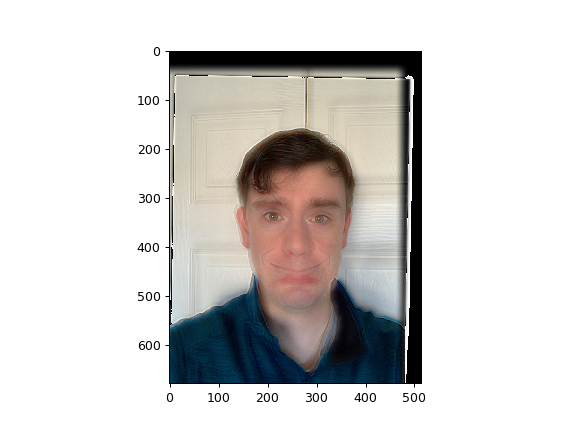

In [15]:
im1_file = './happy.jpg'
im2_file = './sad.jpg'

im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

hsv1 = cv2.cvtColor(im1,cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(im2,cv2.COLOR_BGR2HSV)
[h1,s1,v1] = [hsv1[:,:,0],hsv1[:,:,1],hsv1[:,:,2]]
[h2,s2,v2] = [hsv2[:,:,0],hsv2[:,:,1],hsv2[:,:,2]]

ksize_low = 15
ksize_high = 50
sigma_low = 0.3*((ksize_low-1)*0.5 - 1) + 0.8
sigma_high = 0.3*((ksize_high-1)*0.5 - 1) + 0.8
cutoff_low = 1./(2*np.pi*sigma_low)
cutoff_high = 1./(2*np.pi*sigma_high)

v_hybrid, v_high, v_low = hybridImage(v1, v2, cutoff_low, cutoff_high)

hsv_hyb = hsv2
hsv_hyb[:,:,2] = v_hybrid
rgb = cv2.cvtColor(hsv_hyb,cv2.COLOR_HSV2RGB)
plt.close()
plt.imshow(rgb)


#### Another example of hybrid images fading a Tesla into a Porsche. Here the same alignment tool was used to align the cars except that thw center of the wheels were used for allignment rather than the center of the eyes. 

In [16]:

im1_file = './tesla.jpg'
im2_file = './porsche.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


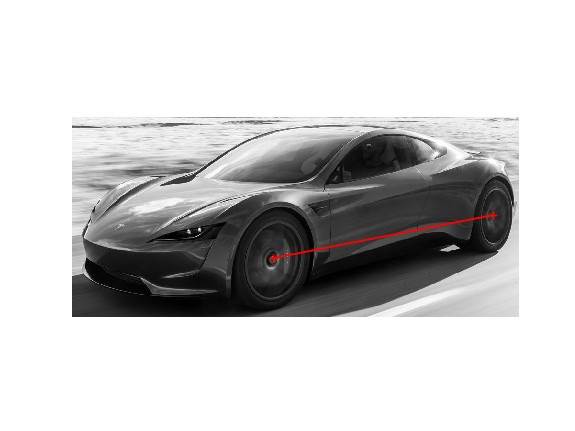

In [17]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


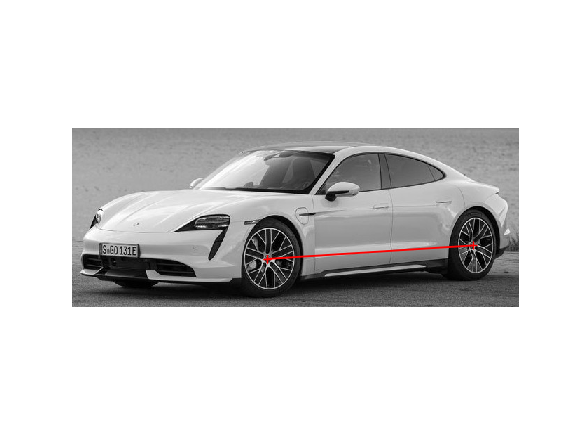

In [18]:
pts_im2 = utils.prompt_eye_selection(im2)

<IPython.core.display.Javascript object>


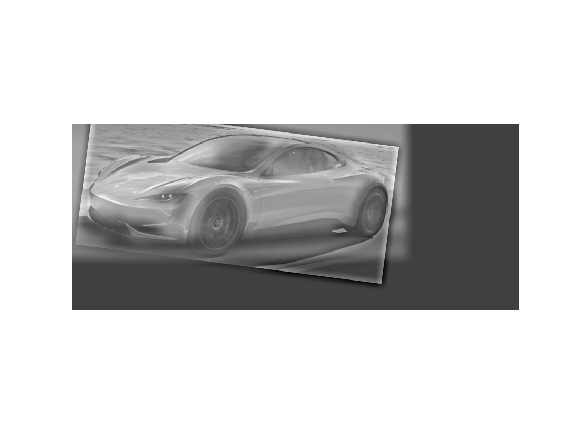

In [20]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

#https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype)
ksize_low = 75
ksize_high = 75
sigma_low = 0.3*((ksize_low-1)*0.5 - 1) + 0.8
sigma_high = 0.3*((ksize_high-1)*0.5 - 1) + 0.8
cutoff_low = 1./(2*np.pi*sigma_low)
cutoff_high = 1./(2*np.pi*sigma_high)
im_hybrid, im_high, im_low = hybridImage(im1, im2, cutoff_low, cutoff_high)

plt.close()
cropped_object = utils.interactive_crop(im_hybrid)

## Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

## Contrast enhancement

In [21]:
def hist_eq(im,alpha):
    returnim = im
    valuehist = np.histogram(im, bins=np.arange(256))
    N = im.size
    c = np.cumsum(valuehist[0])
    for i in range(255):
        returnim = np.where(returnim==i, alpha*c[i]*255./N + (1.-alpha)*i,returnim)
        #np.put(returnim,np.argwhere(returnim==i),c[i]*255./N)
    return returnim

#### Original Image:

<IPython.core.display.Javascript object>


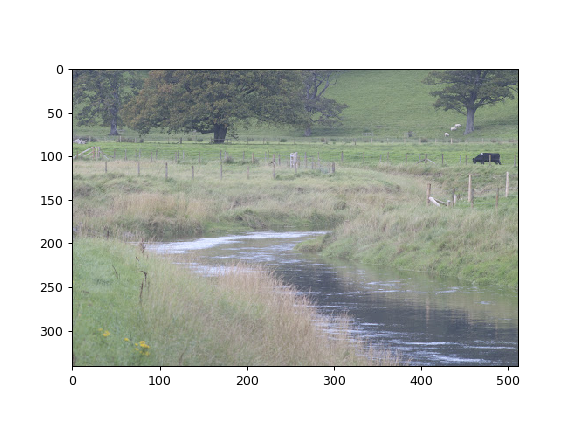

In [22]:
bc = './bad_contrast.jpg'

img = cv2.imread(bc)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

plt.close()
plt.imshow(rgb)

#### Contrast is corrected by performing histogram equalization on the value channel. Histogram equalization seemd to be the best approach to utilize the full range of intensities in the image.

<IPython.core.display.Javascript object>


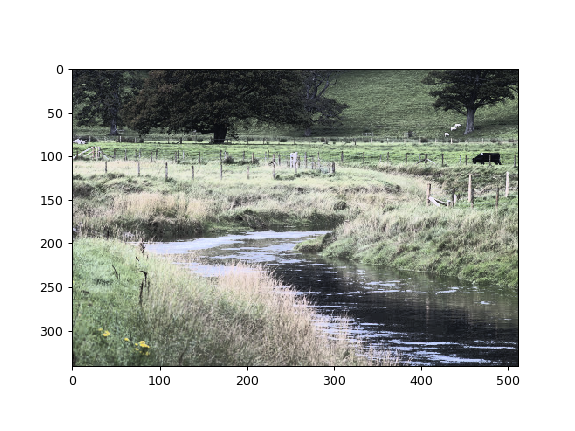

In [23]:
[h,s,v] = [hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]]

veq = hist_eq(v,0.8)
hsv_eq = hsv
hsv_eq[:,:,2] = veq

rgb = cv2.cvtColor(hsv_eq,cv2.COLOR_HSV2RGB)
plt.close()
plt.imshow(rgb)

## Color enhancement 

#### Original Image:

<IPython.core.display.Javascript object>


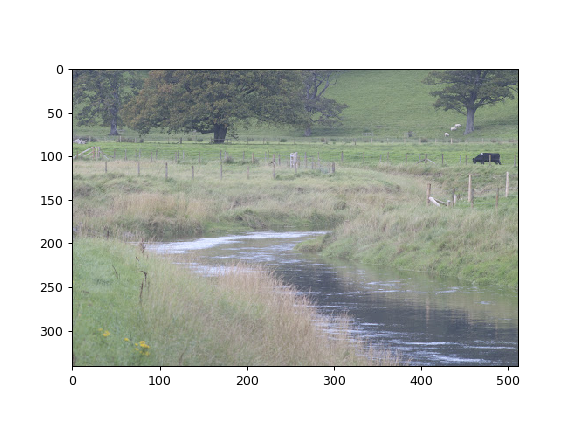

In [24]:
bc = './bad_contrast.jpg'

img = cv2.imread(bc)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

plt.close()
plt.imshow(rgb)

#### The colors are made more vivid by performing a histogram equalization on the saturation channel of the image. 

<IPython.core.display.Javascript object>


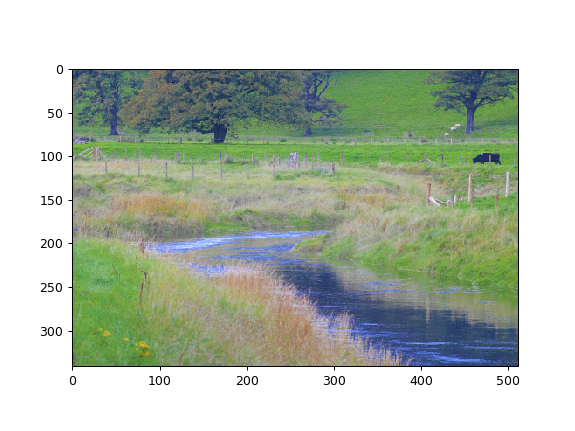

In [25]:
[h,s,v] = [hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]]

sev = hist_eq(s,0.5)
hsv_eq = hsv
hsv_eq[:,:,1] = sev
rgb = cv2.cvtColor(hsv_eq,cv2.COLOR_HSV2RGB)
plt.close()
plt.imshow(rgb)

## Color shift (Bells and Whistles)

In [26]:
def gamma(im,gamma):
    returnim = im/255.
    returnim = np.power(returnim,gamma)
    return returnim*255

#### Original Image:

<IPython.core.display.Javascript object>


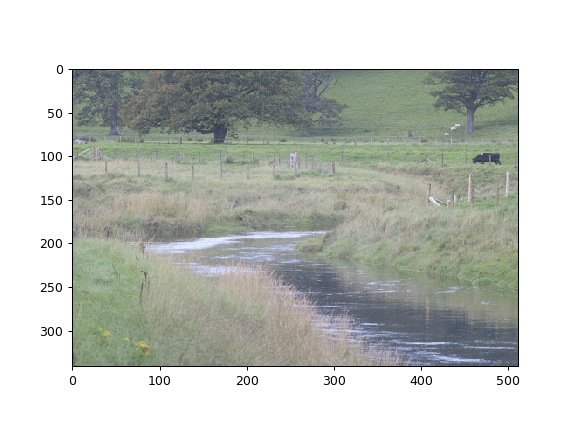

In [27]:
bc = './bad_contrast.jpg'
img = cv2.imread(bc)
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
rgb = cv2.cvtColor(lab,cv2.COLOR_LAB2RGB)

plt.close()
plt.imshow(rgb)

#### Make the immage more red by applying a gamma adjustment on the a channel in the LAB colorspace.

<IPython.core.display.Javascript object>


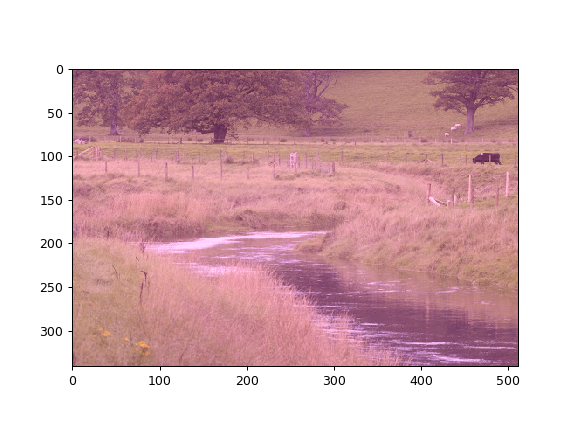

In [28]:
[l,a,b] = [lab[:,:,0],lab[:,:,1],lab[:,:,2]]
ag = gamma(a,.7)
lab_shift = lab
lab_shift[:,:,1] = ag
rgb = cv2.cvtColor(lab_shift,cv2.COLOR_LAB2RGB)

plt.close()
plt.imshow(rgb)


#### In this image the color is made less yellow by applying a negative gamma adjustment on the b channel in the LAB colorspace.

<IPython.core.display.Javascript object>


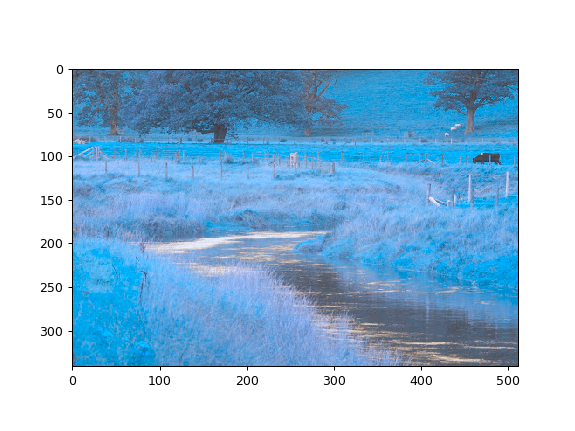

In [29]:
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
[l,a,b] = [lab[:,:,0],lab[:,:,1],lab[:,:,2]]
bg = gamma(b,-0.5)
lab_shift = lab
lab_shift[:,:,2] = bg
rgb = cv2.cvtColor(lab_shift,cv2.COLOR_LAB2RGB)

plt.close()
plt.imshow(rgb)



#### I belive I should receive all 100 points for the regular assignment and 15 points of bells and whistles. I completed all three image enhancement tasks (10 points) and the hybrid image in color (5 points). 